In [1]:
from quantileRegression import quantileRegression
import numpy as np
import runNumbers as rn
import Plotting as plot
import matplotlib.pyplot as plt
%matplotlib inline
# %matplotlib notebook
plt.style.use('ggplot')

Welcome to ROOTaaS 6.06/08


In [2]:

#---------------------------------------------------------------------
#Prepare dataframes for the testing.
#---------------------------------------------------------------------


In [3]:
# Upload Dataframes:
startEvtmc = 1 
stopEvtmc  = 2000001 
qr_mc= quantileRegression("mc")
qr_data= quantileRegression("data")
qr_mc.loadDF(#"/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_mc/",
            "/mnt/t3nfs01/data01/shome/mdonega/dataMC/nt/double_ele_spring16v2_sync_v2_mc/",
                 "cicNoSigmaIetaIeta/trees/",
              # ["DYJetsToLL_13TeV_EBHighR9", "DYJetsToLL_13TeV_EBLowR9", "DYJetsToLL_13TeV_EEHighR9", "DYJetsToLL_13TeV_EELowR9" ],
                   ["DYToEE_powheg_13TeV_EBHighR9", "DYToEE_powheg_13TeV_EBLowR9", "DYToEE_powheg_13TeV_EEHighR9", "DYToEE_powheg_13TeV_EELowR9" ],
                startEvtmc, stopEvtmc, 12345)
startEvtdata = 1 
stopEvtdata  = 4000001 
qr_data.loadDF(#"/mnt/t3nfs01/data01/shome/mdonega/lxplus/work/CMSSW_8_0_26_patch1/src/diphotons/Analysis/macros/double_ele_v9_moriond17_data/",
               "/mnt/t3nfs01/data01/shome/mdonega/dataMC/nt/double_ele_spring16v2_sync_v2_ichep/",
                      "cicNoSigmaIetaIeta/trees/",
                     ["Data_13TeV_EBHighR9", "Data_13TeV_EBLowR9", "Data_13TeV_EEHighR9", "Data_13TeV_EELowR9" ],
                startEvtdata, stopEvtdata, rn.run2016B[0], rn.run2016D[1])
dfmc= qr_mc.getDF()
dfdata=qr_data.getDF()

NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/DYToEE_powheg_13TeV_EELowR9
number of events: 8741743
# lead eleMatch    =  7617405
# sublead eleMatch =  7137144
MC Sublead
lead size:  7617405
MC Lead
sublead size:  7137144
Count final dataset
14754549
Apply basic selection
 ptmin  =  25.0 
 ptmax  =  150.0  
 etamin =  -2.5  
 etamax =  2.5  
 phimin =  -3.14  
 phimax =  3.14
Reshuffle events rndm seed  =  12345
Selecting events   [ 1 ,  2000001 ]  out of  14714149
DataFrame size =  2000000
NT branches: 
Adding trees into a DataFrame
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EBLowR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EEHighR9
  adding  cicNoSigmaIetaIeta/trees/Data_13TeV_EELowR9
number of events: 

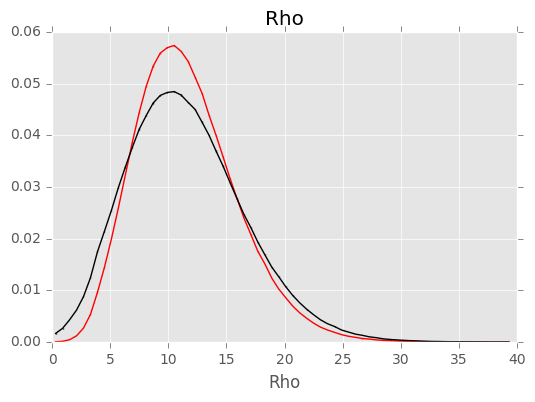

In [4]:
#check pileup
rv=np.arange(0,40,0.6)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho")
#plot histograms
plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="r")

plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="k")
ax.set_title("Rho")

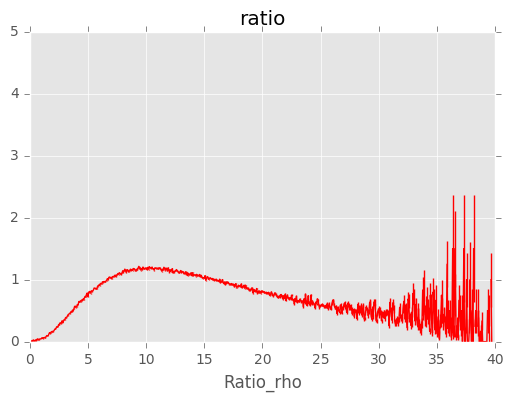

In [6]:
#so the pileup is different for every run, let's do the ratio first:
rv=np.arange(0,40,0.06)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Ratio_rho")

#Do the Ratio wrt the last 
plot.plotHistRatio(dfdata.loc[:,"rho"],dfmc.loc[:,"rho"],rv, Color="r")
ratiomc,edge,ratiodataErrG= plot.getHistRatio(dfdata.loc[:,"rho"],dfmc.loc[:,"rho"],rv,Weight2=dfmc["weight"])

ax.set_ylim([0,5])
ax.set_title('ratio')

In [7]:
import pandas as pd
dfmc['bin'] = np.digitize(dfmc['rho'],edge)
dfmc["weight"]=dfmc["weight"]*ratiomc[dfmc['bin'].values-1]

#cut some infinities:
dfmc=dfmc.query("weight<1000")

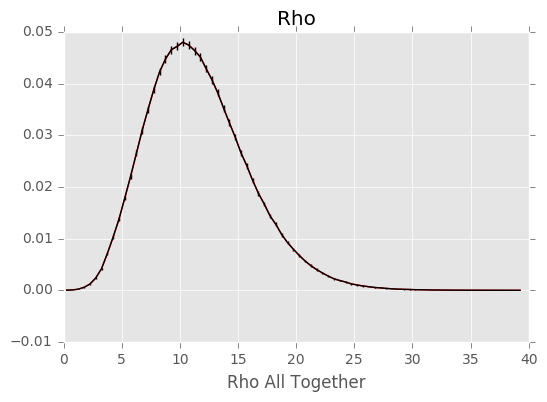

In [9]:
#Check if now Rho Match
rv=np.arange(0,40,0.5)
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel("Rho All Together")
#plot histograms
plot.plotHistErr(dfdata.loc[:,"rho"], rv,Color="r", Weight=dfdata["weight"])

plot.plotHistErr(dfmc.loc[:,"rho"], rv,Color="k", Weight=dfmc["weight"])
ax.set_title("Rho")

In [11]:
#store dataframe to file for training:
import pandas as pd
dfname =  'df_data_v2.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfdata)
hdf.close()
dfname =  'df_mc_v2.h5'
hdf = pd.HDFStore(dfname)
hdf.put('df', dfmc)
hdf.close()